<a href="https://colab.research.google.com/github/Ayan1311819/Machine_Learning/blob/main/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

!pip install kaggle



In [ ]:
!kaggle datasets download -d nafishamoin/bangladeshi-crops-disease-dataset -p /kaggle/working1 #Downloading dataset from kaggle


Dataset URL: https://www.kaggle.com/datasets/nafishamoin/bangladeshi-crops-disease-dataset
License(s): copyright-authors
100% 6.44G/6.45G [01:18<00:00, 105MB/s] 
100% 6.45G/6.45G [01:19<00:00, 87.6MB/s]


In [ ]:
ls /kaggle/working1/

bangladeshi-crops-disease-dataset.zip


In [ ]:
import zipfile
# Extracting Zip files
zip_path = "/kaggle/working1/bangladeshi-crops-disease-dataset.zip"
extract_path = "/kaggle/working/Dataset/"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
ls /kaggle/working/Dataset/

CropDisease/


In [ ]:
!mkdir -p /kaggle/working/Dataset

In [ ]:
!cp -a /kaggle/working/Dataset/CropDisease/Crop___DIsease/. /kaggle/working/Dataset
!rm -r /kaggle/working/Dataset/Invalid

In [ ]:

!mv '/kaggle/working/Dataset/Rice___Brown_Spot' '/kaggle/working/Dataset/Rice: Brown Spot'
!mv '/kaggle/working/Dataset/Corn___Gray_Leaf_Spot' '/kaggle/working/Dataset/Corn: Gray Leaf Spot'
!mv '/kaggle/working/Dataset/Rice___Leaf_Blast' '/kaggle/working/Dataset/Rice: Leaf Blast'
!mv '/kaggle/working/Dataset/Corn___Leaf_Blight' '/kaggle/working/Dataset/Corn: Leaf Blight'
!mv '/kaggle/working/Dataset/Potato___Early_Blight' '/kaggle/working/Dataset/Potato: Early Blight'
!mv '/kaggle/working/Dataset/Potato___Healthy' '/kaggle/working/Dataset/Potato: Healthy'
!mv '/kaggle/working/Dataset/Rice___Healthy' '/kaggle/working/Dataset/Rice: Healthy'
!mv '/kaggle/working/Dataset/Wheat___Brown_Rust' '/kaggle/working/Dataset/Wheat: Brown Rust'
!mv '/kaggle/working/Dataset/Potato___Late_Blight' '/kaggle/working/Dataset/Potato: Late Blight'
!mv '/kaggle/working/Dataset/Wheat___Healthy' '/kaggle/working/Dataset/Wheat: Healthy'
!mv '/kaggle/working/Dataset/Wheat___Yellow_Rust' '/kaggle/working/Dataset/Wheat: Yellow Rust'
!mv '/kaggle/working/Dataset/Corn___Healthy' '/kaggle/working/Dataset/Corn: Healthy'
!mv '/kaggle/working/Dataset/Corn___Common_Rust' '/kaggle/working/Dataset/Corn: Common Rust'
!mv '/kaggle/working/Dataset/Rice___Hispa' '/kaggle/working/Dataset/Rice: Hispa'

In [ ]:
CLASS_NAMES = []
if len(CLASS_NAMES) == 0:
    for directory in sorted(os.listdir('/kaggle/working/Dataset/')):
        CLASS_NAMES.append(directory)
NUM_CLASSES = len(CLASS_NAMES)
NUM_CLASSES, CLASS_NAMES


(15,
 ['Corn: Common Rust',
  'Corn: Gray Leaf Spot',
  'Corn: Healthy',
  'Corn: Leaf Blight',
  'CropDisease',
  'Potato: Early Blight',
  'Potato: Healthy',
  'Potato: Late Blight',
  'Rice: Brown Spot',
  'Rice: Healthy',
  'Rice: Hispa',
  'Rice: Leaf Blast',
  'Wheat: Brown Rust',
  'Wheat: Healthy',
  'Wheat: Yellow Rust'])

In [ ]:
# prompt: drop the label in above cell 'CropDisease'
!rm -r /kaggle/working/Dataset/CropDisease

In [ ]:
# ls /kaggle/working/Dataset/'Corn: Common Rust'/

In [ ]:
import os
import pandas as pd

# DATA DISTRIBUTION
dataset_path = '/kaggle/working/Dataset'
data = []

# Iterate through each directory in the dataset
for label in os.listdir(dataset_path):
    # Create the full path to the directory
    dir_path = os.path.join(dataset_path, label)
    if os.path.isdir(dir_path):
        # Count the number of image files in the directory, handling spaces and special characters
        image_count = len([f for f in os.listdir(dir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        data.append({'label': label, 'image_count': image_count})

df = pd.DataFrame(data)
print(df)


                   label  image_count
0    Potato: Late Blight         3131
1     Wheat: Yellow Rust         1156
2       Rice: Brown Spot          563
3      Corn: Leaf Blight         3816
4        Potato: Healthy         2006
5         Wheat: Healthy         1497
6            Rice: Hispa          523
7          Rice: Healthy          523
8   Potato: Early Blight         3149
9          Corn: Healthy         3718
10     Wheat: Brown Rust         1128
11  Corn: Gray Leaf Spot         3284
12     Corn: Common Rust         3814
13      Rice: Leaf Blast         1182


In [ ]:
class_list = list(class_indices.keys())
print(class_list)
ic = []
#print(class_list)
for i in range (len(class_list)):
  count = df['image_count'][df['label'] == class_list[i]].values[0]
  ic.append(count)
print(ic)

['Corn: Common Rust', 'Corn: Gray Leaf Spot', 'Corn: Healthy', 'Corn: Leaf Blight', 'Potato: Early Blight', 'Potato: Healthy', 'Potato: Late Blight', 'Rice: Brown Spot', 'Rice: Healthy', 'Rice: Hispa', 'Rice: Leaf Blast', 'Wheat: Brown Rust', 'Wheat: Healthy', 'Wheat: Yellow Rust']
[3814, 3284, 3718, 3816, 3149, 2006, 3131, 563, 523, 523, 1182, 1128, 1497, 1156]


In [ ]:
from operator import iconcat
from sklearn.utils import class_weight
import numpy as np
#labels = class indices and imgcounts = ic
total = sum(ic)
print(total)
NC = len(ic)
print(NC)

29490
14


In [ ]:
class_weights = []
for i in range(NC):
  cw = total / (NC * ic[i])
  class_weights.append(cw)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: 0.5522885609408944, 1: 0.6414216112754481, 2: 0.566548835779605, 3: 0.5519991015274034, 4: 0.6689198384974822, 5: 1.0500640934339838, 6: 0.6727654332253502, 7: 3.7414361837097183, 8: 4.027588090685605, 9: 4.027588090685605, 10: 1.782088469905729, 11: 1.8674012158054711, 12: 1.4070999141139422, 13: 1.8221700444883835}


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


Model

In [ ]:
from tensorflow import keras
from google.colab import drive
drive.mount('/content/drive')
Amodel3 = keras.models.load_model('/content/drive/My Drive/Amodel3.0_full.keras')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Amodel3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 635,212 (2.42 MB)

 Trainable params: 211,502 (826.18 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 423,006 (1.61 MB)

Data augmentation (to generalize well: to train model to be invariant to small changes)

In [ ]:
#Creating an object of ImageDataGenerator for augmenting training dataset
train_datagen = ImageDataGenerator(rescale= 1./255,
 rotation_range= 20,
 shear_range=0.1,
 zoom_range=0.1,
 width_shift_range=0.05,
 height_shift_range=0.05,
 horizontal_flip=True,
 vertical_flip=True,
 validation_split=0.20,
 )

test_datagen = ImageDataGenerator(rescale= 1./255,validation_split=0.20)

Data loader

In [ ]:
train_dir = '/kaggle/working/Dataset/'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    color_mode = "rgb",
    subset='training',
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    color_mode= "rgb",
    subset='validation',
)


Found 23599 images belonging to 14 classes.
Found 5891 images belonging to 14 classes.


In [ ]:
class_indices = train_generator.class_indices
print(class_indices)

{'Corn: Common Rust': 0, 'Corn: Gray Leaf Spot': 1, 'Corn: Healthy': 2, 'Corn: Leaf Blight': 3, 'Potato: Early Blight': 4, 'Potato: Healthy': 5, 'Potato: Late Blight': 6, 'Rice: Brown Spot': 7, 'Rice: Healthy': 8, 'Rice: Hispa': 9, 'Rice: Leaf Blast': 10, 'Wheat: Brown Rust': 11, 'Wheat: Healthy': 12, 'Wheat: Yellow Rust': 13}


In [ ]:
# train_datagen and test_datagen for alexnet
# Get sample numbers for fit and validation
nb_train_samples = train_generator.samples
nb_test_samples = validation_generator.samples
classes = list(train_generator.class_indices.keys())
print(len(classes))

14


In [ ]:
history = Amodel3.fit(train_generator, epochs=1, validation_data=validation_generator, class_weight=class_weights)

738/738 ━━━━━━━━━━━━━━━━━━━━ 639s 859ms/step - accuracy: 0.9603 - loss: 0.2239 - val_accuracy: 0.9167 - val_loss: 0.3433


In [ ]:
save_path ='/content/drive/My Drive/Amodel3.1_full.keras' #or .keras file
Amodel3.save(save_path)

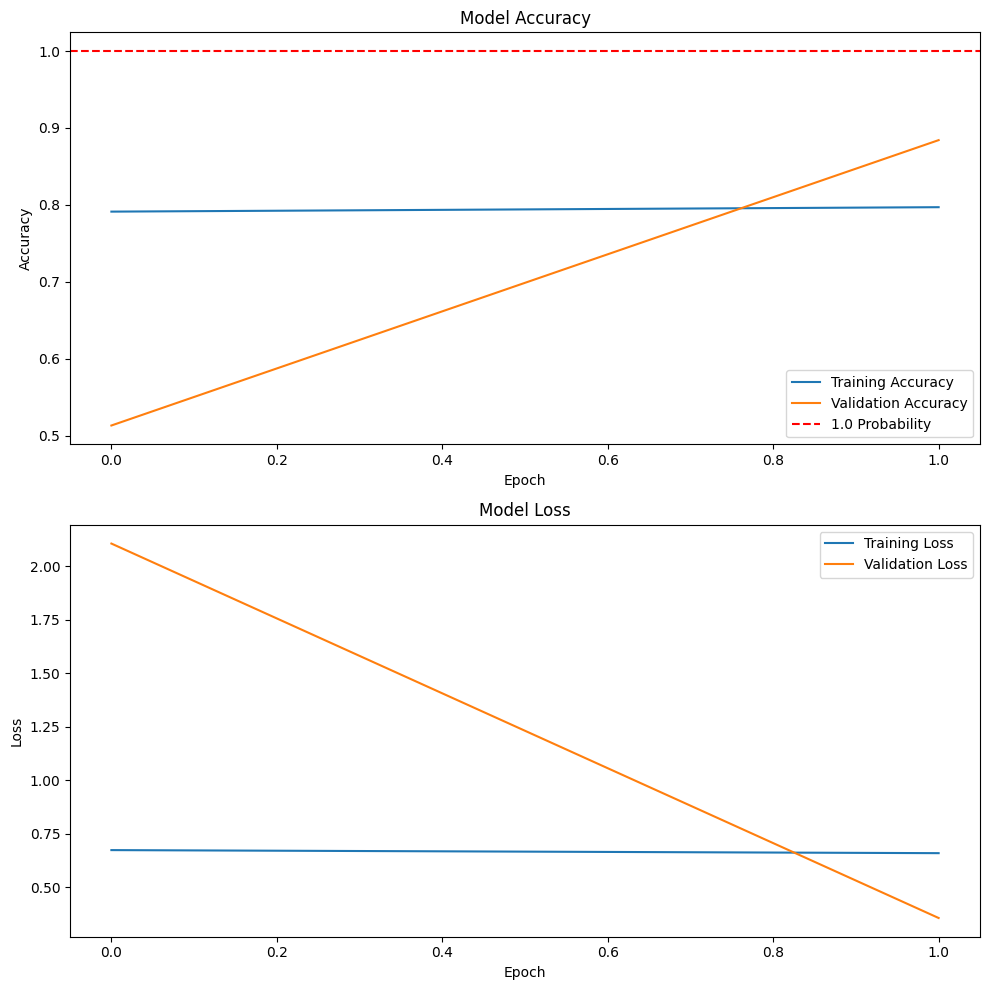

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# Plotting the model accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=1, color='r', linestyle='--', label='1.0 Probability')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the model loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
#train accuracy is less than val maybe because of rotations or dropouts!

In [ ]:
#CONFUSION MATRIX
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
model = load_model('model_full.h5')

# Make predictions
predictions = model.predict(validation_generator)

# Get true labels and predicted labels
y_true = validation_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Extract class names
class_names = list(validation_generator.class_indices.keys())
plot_confusion_matrix(cm, class_names)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path ='/content/drive/My Drive/Fmodel1.0_full.keras' #or .keras file
Fmodel.save(save_path)